Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/MyDrive/DataPath/Week 3 Python

/content/gdrive/MyDrive/DataPath/Week 3 Python


In [4]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Input Dataset

In [5]:
#Super_cleaned_datase1.csv -> dataset after data manipulation in Kak Owen Google Colab
df = pd.read_csv('Super_cleaned_dataset1.csv')

Data Cleaning

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,workload,need_python,need_excel,need_hadoop,need_spark,need_tableau,need_big_data,need_deep_learning
0,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,0.830192,True,True,False,False,False,False,False
1,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,0.313594,True,True,False,False,False,False,True
2,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,0.254185,True,True,False,False,False,False,False
3,data scientist,154.0,About Us:\n\nHeadquartered in beautiful Santa ...,4.200000,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,0.351000,True,True,True,True,False,False,False
4,data scientist,154.0,Posting Title\nData Scientist / Machine Learni...,3.900000,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.475844,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,data scientist,136.0,About Foundation Medicine:\n\nFoundation Medic...,4.000000,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.404669,True,False,False,False,False,False,False
475,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,0.342677,True,True,True,False,True,True,False
476,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology,0.260404,True,True,True,False,True,False,False
477,data scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services,0.320960,True,False,True,True,False,True,True


In [8]:
df['State'] = df['Location'].apply(lambda x: x.split(', ')[-1])

In [9]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,workload,need_python,need_excel,need_hadoop,need_spark,need_tableau,need_big_data,need_deep_learning,State
0,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,0.830192,True,True,False,False,False,False,False,MA
1,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,0.313594,True,True,False,False,False,False,True,MA
2,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,0.254185,True,True,False,False,False,False,False,NY
3,data scientist,154.0,About Us:\n\nHeadquartered in beautiful Santa ...,4.200000,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,0.351000,True,True,True,True,False,False,False,CA
4,data scientist,154.0,Posting Title\nData Scientist / Machine Learni...,3.900000,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.475844,True,False,False,False,False,False,False,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,data scientist,136.0,About Foundation Medicine:\n\nFoundation Medic...,4.000000,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.404669,True,False,False,False,False,False,False,MA
475,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,0.342677,True,True,True,False,True,True,False,NJ
476,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology,0.260404,True,True,True,False,True,False,False,CA
477,data scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services,0.320960,True,False,True,True,False,True,True,CA


In [10]:
def clean_states(x):
    if 'united states' in x.lower():
        return 'NY'
    elif 'new jersey' in x.lower():
        return 'NJ'
    elif 'california' in x.lower():
        return 'CA'
    elif 'texas' in x.lower():
        return 'TX'
    elif 'utah' in x.lower():
        return 'UT'
    else:
        return str(x)

df['State'] = df['State'].apply(clean_states)

In [11]:
df['need_python'][df['need_python']==True] = 1
df['need_python'][df['need_python']==False] = 0

df['need_excel'][df['need_excel']==True] = 1
df['need_excel'][df['need_excel']==False] = 0

df['need_hadoop'][df['need_hadoop']==True] = 1
df['need_hadoop'][df['need_hadoop']==False] = 0

df['need_spark'][df['need_spark']==True] = 1
df['need_spark'][df['need_spark']==False] = 0

df['need_tableau'][df['need_tableau']==True] = 1
df['need_tableau'][df['need_tableau']==False] = 0

df['need_big_data'][df['need_big_data']==True] = 1
df['need_big_data'][df['need_big_data']==False] = 0

df['need_deep_learning'][df['need_deep_learning']==True] = 1
df['need_deep_learning'][df['need_deep_learning']==False] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [12]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,workload,need_python,need_excel,need_hadoop,need_spark,need_tableau,need_big_data,need_deep_learning,State
0,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,0.830192,1.0,1.0,0.0,0.0,0.0,0.0,0.0,MA
1,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,0.313594,1.0,1.0,0.0,0.0,0.0,0.0,1.0,MA
2,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,0.254185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NY
3,data scientist,154.0,About Us:\n\nHeadquartered in beautiful Santa ...,4.200000,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,0.351000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,CA
4,data scientist,154.0,Posting Title\nData Scientist / Machine Learni...,3.900000,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.475844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,data scientist,136.0,About Foundation Medicine:\n\nFoundation Medic...,4.000000,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,0.404669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MA
475,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,0.342677,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NJ
476,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology,0.260404,1.0,1.0,1.0,0.0,1.0,0.0,0.0,CA
477,data scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services,0.320960,1.0,0.0,1.0,1.0,0.0,1.0,1.0,CA


GAINING INSIGHT

Average Salary


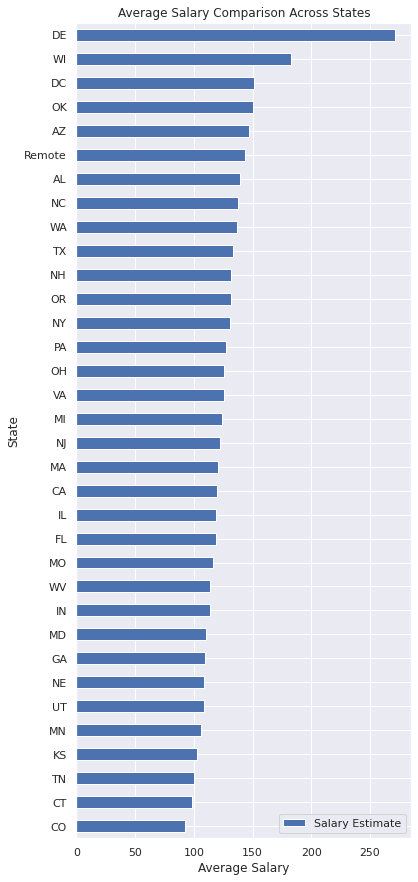

In [13]:
df.groupby(['State'])[['Salary Estimate']].mean().sort_values('Salary Estimate').plot(kind='barh',figsize=(6,15))
plt.title('Average Salary Comparison Across States')
plt.xlabel('Average Salary')
plt.show()

Average Workload

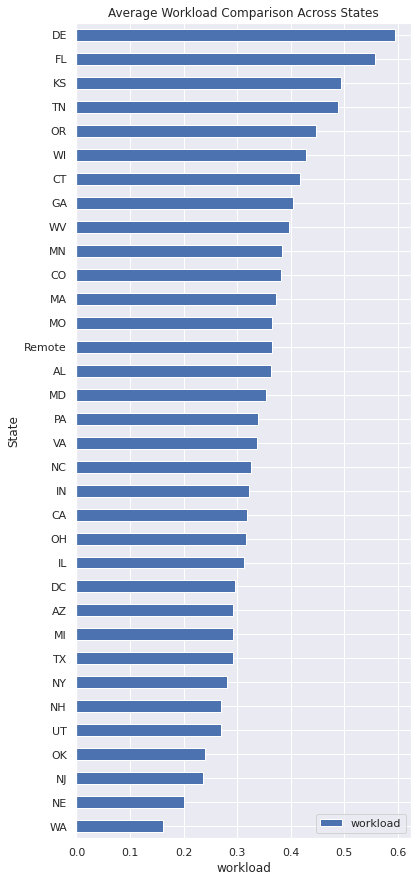

In [14]:
df.groupby(['State'])[['workload']].mean().sort_values('workload').plot(kind='barh',figsize=(6,15))
plt.title('Average Workload Comparison Across States')
plt.xlabel('workload')
plt.show()

Each of needed skills (%)

In [15]:
dftest1 = df.groupby(['State'])[['need_python', 'need_excel', 'need_hadoop', 'need_spark', 'need_tableau', 'need_big_data', 'need_deep_learning' ]].sum()

In [17]:
dftest1 = dftest1.T

In [19]:
for column in dftest1.columns:
  dftest1[column] = (100*dftest1[column] / (dftest1[column].sum()))

In [21]:
dftest1 = dftest1.T

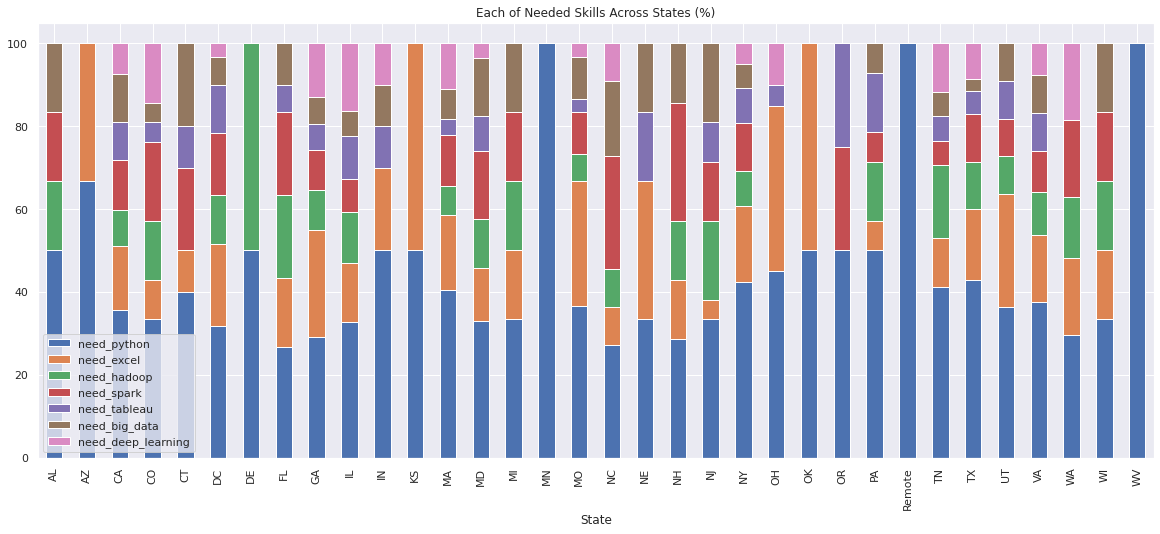

In [22]:
dftest1.groupby(['State'])[['need_python', 'need_excel', 'need_hadoop', 'need_spark', 'need_tableau', 'need_big_data', 'need_deep_learning' ]].sum().plot(kind='bar',figsize=(20,8),stacked=True)
plt.title('Each of Needed Skills Across States (%)')
plt.show()